In [ ]:
###  使用图形展示 图片的通道

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('F:/opencv/img/cat2.jpg')

r, g, b = cv2.split(img)


No handles with labels found to put in legend.


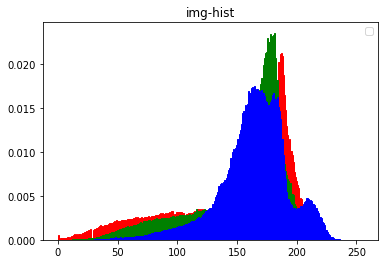

In [4]:
plt.figure()
r_flatten = np.array(r).flatten()
plt.hist(r_flatten, bins = 256, density=True, facecolor = 'r', edgecolor = 'r')
g_flatten = np.array(g).flatten()
plt.hist(g_flatten, bins = 256, density=True, facecolor = 'g', edgecolor = 'g')
b_flatten = np.array(b).flatten()
plt.hist(b_flatten, bins = 256, density=True, facecolor = 'b', edgecolor = 'b')
plt.title('img-hist')
plt.legend()
plt.show()

In [5]:

def calcAndDrawHist(image, color):  
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])  
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)  
    histImg = np.zeros([256,256,3], np.uint8)  
    hpt = int(0.9* 256);  
      
    for h in range(256):  
        intensity = int(hist[h]*hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color)  
    return histImg


In [6]:
img = cv2.imread('F:/opencv/img/cat2.jpg')
b, g, r = cv2.split(img)  

histImgB = calcAndDrawHist(b, [255, 0, 0])  
histImgG = calcAndDrawHist(g, [0, 255, 0])  
histImgR = calcAndDrawHist(r, [0, 0, 255])  

cv2.imshow("histImgB", histImgB)  
cv2.imshow("histImgG", histImgG)  
cv2.imshow("histImgR", histImgR)  
cv2.imshow("src", img)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

In [7]:


h = np.zeros((256,256,3)) #创建用于绘制直方图的全0图像 
bins = np.arange(256).reshape(256,1) #直方图中各bin的顶点位置  
color = [ (255,0,0),(0,255,0),(0,0,255) ] #BGR三种颜色  
for ch, col in enumerate(color):  
    originHist = cv2.calcHist([img],[ch],None,[256],[0,256])  
    cv2.normalize(originHist, originHist,0,255*0.9,cv2.NORM_MINMAX)  
    hist=np.int32(np.around(originHist))  
    pts = np.column_stack((bins,hist))  
    cv2.polylines(h,[pts],False,col)  
       
h=np.flipud(h)  
       
cv2.imshow('colorhist',h)  
cv2.waitKey(0) 

-1

### 直方图均衡化
#### 想象一下如果一副图像中的大多是像素点的像素值都集中在一个像素值范围之内会怎样呢？例如，如果一幅图片整体很亮，那所有的像素值应该都会很高。但是一副高质量的图像的像素值分布应该很广泛。
#### 所以你应该把它的直方图做一个横向拉伸（如下图），这就是直方图均衡化要做的事情。通常情况下这种操作会改善图像的对比度。
![jupyter](./hist_normailzer.jpg)

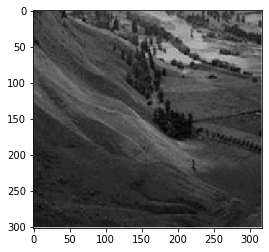

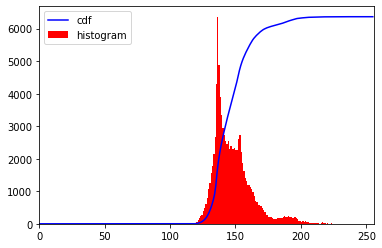

In [8]:
### numpy 中的直方图均衡
img = cv2.imread('f:/opencv/img/wiki.png', 0)
plt.imshow(img, 'gray')
plt.show()
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
## 计算累计分布
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

#### 我们可以看出来直方图大部分在灰度值较高的部分，而且分布很集中。而我们希望直方图的分布比较分散，能够涵盖整个 x 轴。所以，我们就需要一个变换函数帮助我们把现在的直方图映射到一个广泛分布的直方图中。这就是直方图均衡化要做的事情。
#### 我们现在要找到直方图中的最小值（除了 0），并把它用于'wiki.png'的直方图均衡化公式。但是我在这里使用了 Numpy 的掩模数组。对于掩模数组的所有操作都只对 non-masked 元素有效。你可以到 Numpy 文档中获取更多掩模数组的信息。

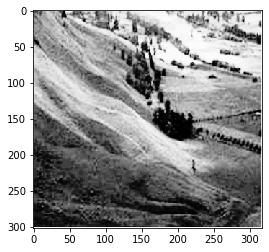

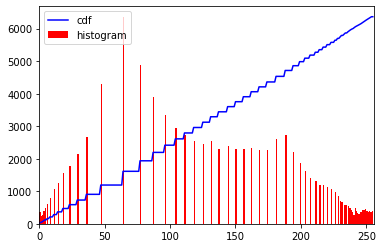

In [9]:
# 构建 Numpy 掩模数组， cdf 为原数组，当数组元素为 0 时，掩盖（计算时被忽略）。
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
# 对被掩盖的元素赋值，这里赋值为 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
# 新的图片
img2 = cdf[img]

plt.imshow(img2, 'gray')
plt.show()
hist, bins = np.histogram(img2.flatten(), 256, [0, 256])
## 计算累计分布
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(), 256, [0, 256], color='r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

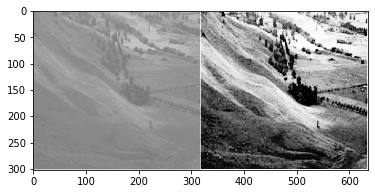

In [11]:
### opencv 中的真方图均衡
img = cv2.imread('f:/opencv/img/wiki.png', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.imshow(res, 'gray')
plt.show()

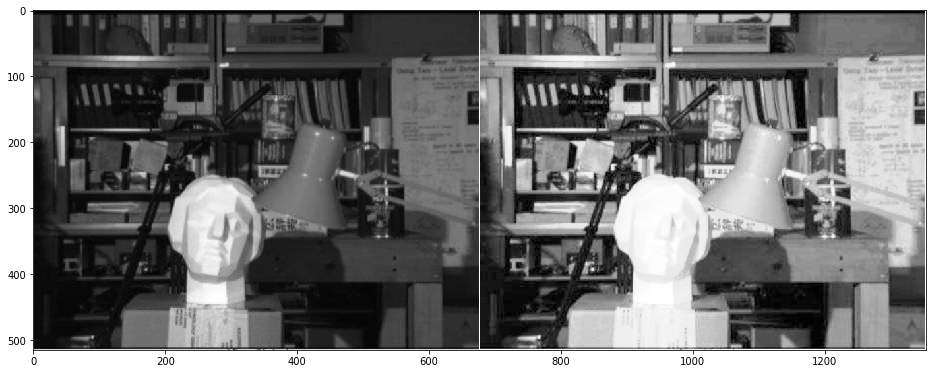

In [13]:
### CLAHE 有限对比适应性直方图均衡化
#### 在做的直方图均衡化会改变整个图像的对比度，但是在很多情况下，这样做的效果并不好 如：
img = cv2.imread('f:/opencv/img/hist_src.png', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ))
plt.figure(figsize=(16, 12))
plt.imshow(res, 'gray')
plt.show()


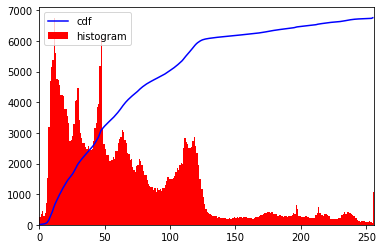

In [14]:
### 在进行完直方图均衡化之后，图片背景的对比度被改变了。但是你再对比一下两幅图像中雕像的面图，由于太亮我们丢失了很多信息。造成这种结果的根本原因在于这幅图像的直方图并不是集中在某一个区域
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
## 计算累计分布
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

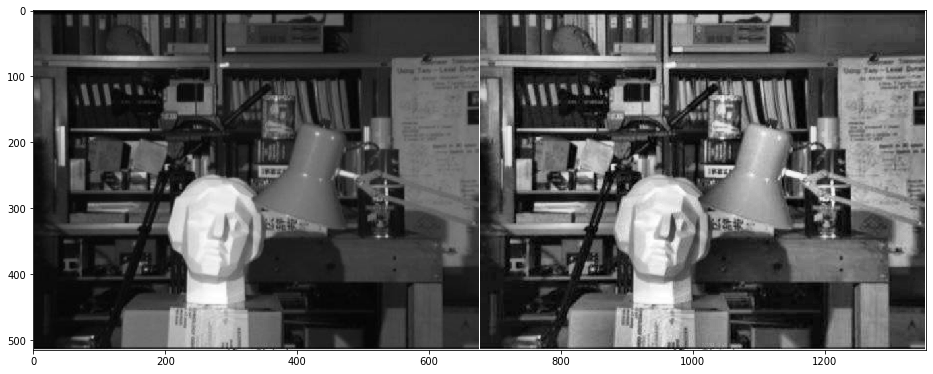

In [15]:
### 为了解决这个问题，我们需要使用自适应的直方图均衡化。这种情况下，整幅图像会被分成很多小块，这些小块被称为“tiles”（在 OpenCV 中 tiles 的大小默认是 8x8），然后再对每一个小块分别进行直方图均衡化
img = cv2.imread('f:/opencv/img/hist_src.png', 0)
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
cl1 = clahe.apply(img)
res = np.hstack((img, cl1))
plt.figure(figsize=(16, 12))
plt.imshow(res, 'gray')
plt.show()
